<a href="https://colab.research.google.com/github/park-moonkyu/prophet/blob/main/neuralprophet(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-0dimrjtd
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-0dimrjtd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 4.6MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.2.8-cp36-none-any.whl size=56718 sha256=bdc5adf8a96f3e6e56d803e14832034ecd5c883d91b10980d20c4af37f66ca4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-djl4ebtc/wheels/5a/29/25/58347b486c135e3aaa41f629bace08cfb3e92d08c65d2b4acf
Successfully built neuralprophet
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [24]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet

df = pd.read_csv('./final.csv')
df=df[['DT','SALE_SUM_AMT']]

test=df[-52:]
train=df[:-53]

test.rename(columns={'DT': 'ds', 'SALE_SUM_AMT': 'y'}, inplace=True)

df=train
df.rename(columns={'DT': 'ds', 'SALE_SUM_AMT': 'y'}, inplace=True)
df

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



,ds,y
0,2015-01-01 00:00:00,1.676517e+09
1,2015-01-08 00:00:00,6.922813e+09
2,2015-01-15 00:00:00,5.840964e+09
3,2015-01-22 00:00:00,8.046580e+09
4,2015-01-29 00:00:00,1.856653e+10
...,...,...
205,2018-11-26 00:00:00,2.184620e+10
206,2018-12-03 00:00:00,1.058227e+10
207,2018-12-10 00:00:00,1.338622e+10
208,2018-12-17 00:00:00,1.122013e+10


In [25]:
def modify_date(row):
    return row[:10]

df['ds'] = df['ds'].apply(modify_date)
test['ds'] = test['ds'].apply(modify_date)

df.head()



,ds,y
0,2015-01-01,1.676517e+09
1,2015-01-08,6.922813e+09
2,2015-01-15,5.840964e+09
3,2015-01-22,8.046580e+09
4,2015-01-29,1.856653e+10


In [26]:
df['y']=np.log(df['y'])
test['y']=np.log(test['y'])
print(np.power(np.e,df['y'][0]))
print(df['y'][0])

1676516927.0000005
21.23998422044947


In [10]:

df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [17]:
m = NeuralProphet()
m.fit(df, freq="W")

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 2.85E-01
Epoch[152/152]: 100%|██████████| 152/152 [00:07<00:00, 19.06it/s, SmoothL1Loss=0.00746, MAE=0.299, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.259663,2.053495,0.0
1,0.082863,1.105841,0.0
2,0.017598,0.517981,0.0
3,0.012479,0.395790,0.0
4,0.009963,0.354604,0.0
...,...,...,...
147,0.007505,0.300079,0.0
148,0.007494,0.299384,0.0
149,0.007474,0.299106,0.0
150,0.007463,0.299027,0.0


In [18]:
future = m.make_future_dataframe(df=df, periods=52)
forecast = m.predict(df=future)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



In [31]:
forecast.to_csv('./nenural.scale.csv')

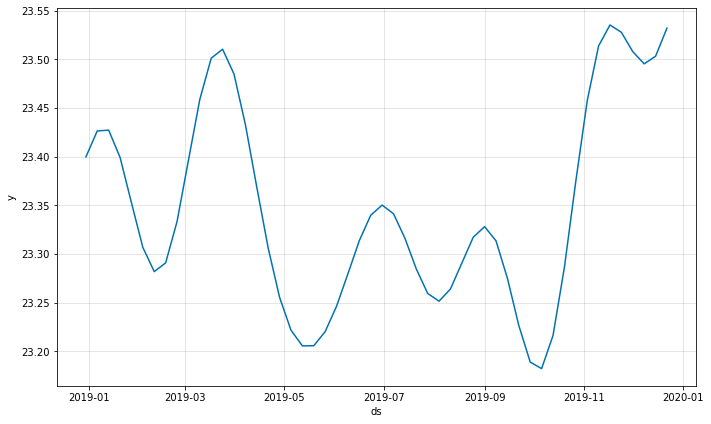

In [19]:
fig = m.plot(forecast)

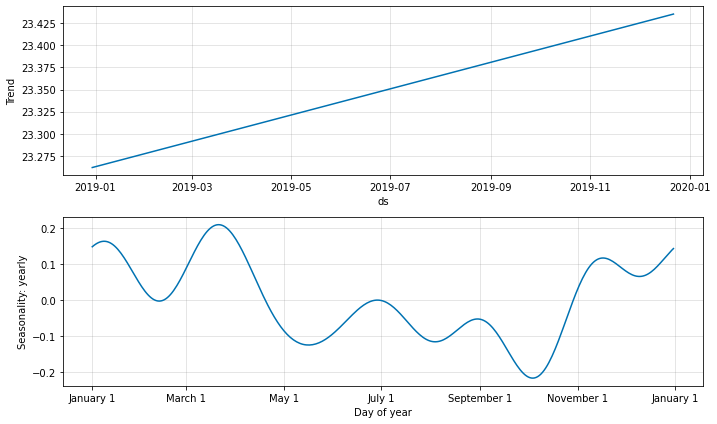

In [20]:
fig_comp = m.plot_components(forecast)


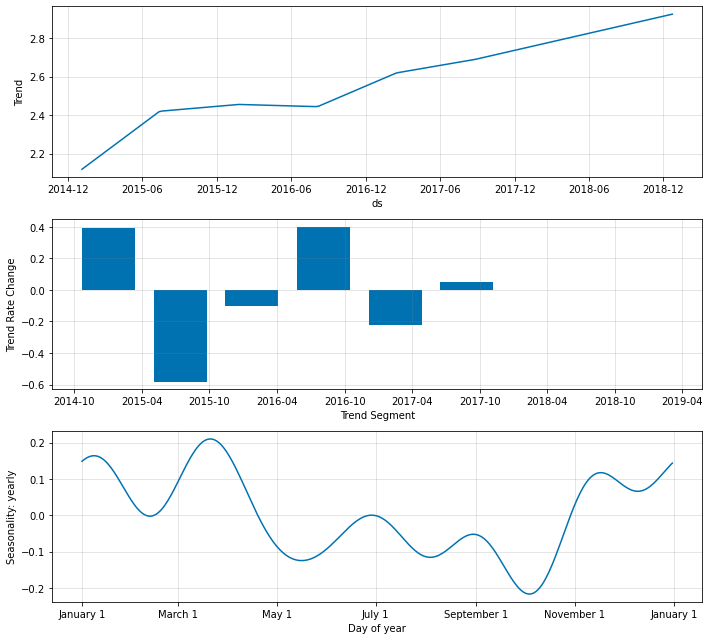

In [21]:
fig_param = m.plot_parameters()

In [27]:
m = NeuralProphet()

train_metrics = m.fit(df, freq="W")
val_metrics = m.test(test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 2.31E-01
Epoch[152/152]: 100%|██████████| 152/152 [00:07<00:00, 19.31it/s, SmoothL1Loss=0.00746, MAE=0.299, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE
1         0.004  0.243
